In [1]:
%reset -f

import time
import numpy as np
import scipy.io as spi
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.layers import Dense, Input, Lambda, Dot, LSTM
from tensorflow.keras.layers.experimental import preprocessing

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation, CuDNNLSTM, CuDNNGRU, SimpleRNN

with tf.device('/device:cpu:0'):
    dt = 0.01
    min_t = 0
    max_t = 2

    t = np.arange(min_t, max_t, dt)

    data = spi.loadmat('data_400_samples_fs_100Hz_76_storey_NL_20FT.mat')

    f = data['f'].T

    for disp_num in range(0,5):

        if disp_num == 0:
            y = data['y'][5-1,:,:]
        elif disp_num == 1:
            y = data['y'][15-1,:,:]
        elif disp_num == 2:
            y = data['y'][35-1,:,:]
        elif disp_num == 3:
            y = data['y'][65-1,:,:]
        else:
            y = data['y'][75-1,:,:]

        y = y.T[..., np.newaxis]

        print(f.shape, y.shape)

        train_f = f
        train_y = y

        X_data = f
        y_data = y

        from sklearn.preprocessing import MinMaxScaler

        X_data_flatten = np.reshape(X_data, [X_data.shape[0]*X_data.shape[1], 1])
        scaler_X = MinMaxScaler(feature_range=(-1, 1))
        scaler_X.fit(X_data_flatten)
        X_data_flatten_map = scaler_X.transform(X_data_flatten)
        X_data_map = np.reshape(X_data_flatten_map, [X_data.shape[0], X_data.shape[1], 1])

        y_data_flatten = np.reshape(y_data, [y_data.shape[0]*y_data.shape[1], y_data.shape[2]])
        scaler_y = MinMaxScaler(feature_range=(-1, 1))
        scaler_y.fit(y_data_flatten)
        y_data_flatten_map = scaler_y.transform(y_data_flatten)
        y_data_map = np.reshape(y_data_flatten_map, [y_data.shape[0], y_data.shape[1], y_data.shape[2]])

        X_data_new = X_data_map
        y_data_new = y_data_map

        train_indices = 400

        X_train = X_data_new[0:train_indices]
        y_train = y_data_new[0:train_indices]

        data_dim = X_train.shape[2]  # number of input features
        timesteps = X_train.shape[1]
        num_classes = y_train.shape[2]  # number of output features
        batch_size = 10

        adam = Adam(learning_rate=0.001, decay=0.0001)
        model = Sequential()
        model.add(SimpleRNN(50, return_sequences=True, stateful=False, input_shape=(None, 1)))
        model.add(Dense(1))
        model.summary()

        model.compile(loss='mean_squared_error', optimizer=adam)

        print(X_train.shape, y_train.shape)
        start_time = time.time()
        for i in range(0, 40):
            model.fit(X_train, y_train, epochs=1, batch_size = batch_size)
            model.fit(X_train, y_train, epochs=24, verbose = 0, batch_size = batch_size)
        print('Time(s) --> ',time.time()-start_time)

        if disp_num == 0:
            model.save_weights('./model/RNNS_400S_wts_DO_76DOF_1')
        elif disp_num == 1:
            model.save_weights('./model/RNNS_400S_wts_DO_76DOF_2')
        elif disp_num == 2:
            model.save_weights('./model/RNNS_400S_wts_DO_76DOF_3')
        elif disp_num == 3:
            model.save_weights('./model/RNNS_400S_wts_DO_76DOF_4')
        else:
            model.save_weights('./model/RNNS_400S_wts_DO_76DOF_5')

(400, 200) (400, 200, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 50)          2600      
                                                                 
 dense (Dense)               (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
(400, 200, 1) (400, 200, 1)
40/40 [==============================] - 0s 9ms/step - loss: 0.0015
Time(s) -->  334.79149985313416
(400, 200) (400, 200, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 50)          2600      
                                                    

(400, 200) (400, 200, 1)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, None, 50)          2600      
                                                                 
 dense_15 (Dense)            (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
0 0
(10000, 200) (10000, 200)


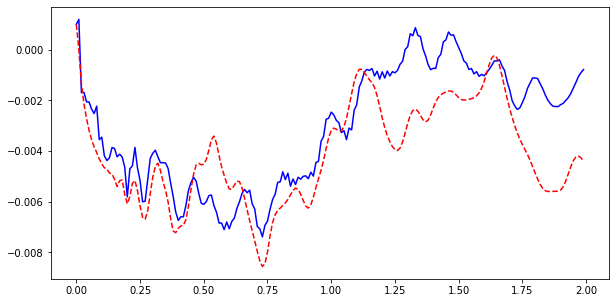

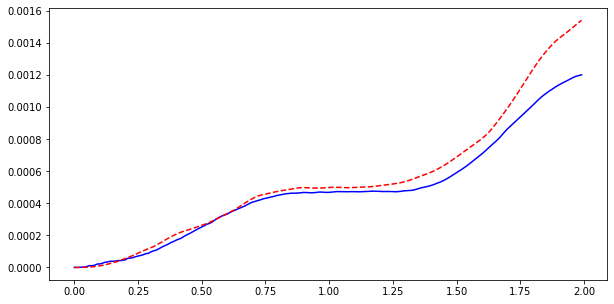

(400, 200) (400, 200, 1)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, None, 50)          2600      
                                                                 
 dense_16 (Dense)            (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
1 0
(10000, 200) (10000, 200)


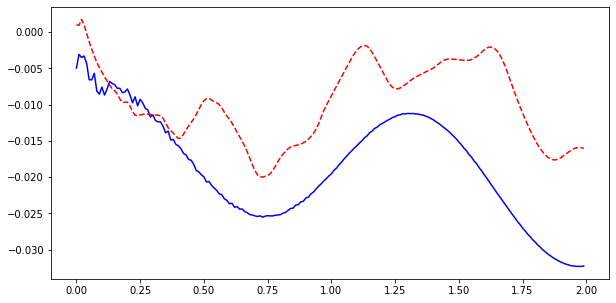

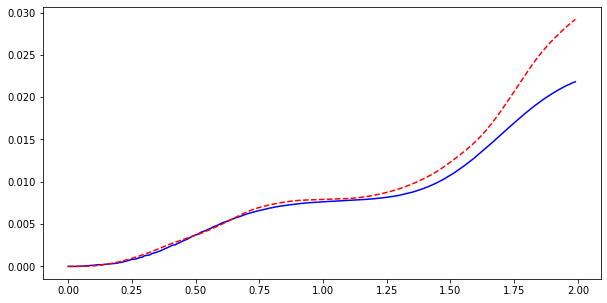

(400, 200) (400, 200, 1)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, None, 50)          2600      
                                                                 
 dense_17 (Dense)            (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
2 0
(10000, 200) (10000, 200)


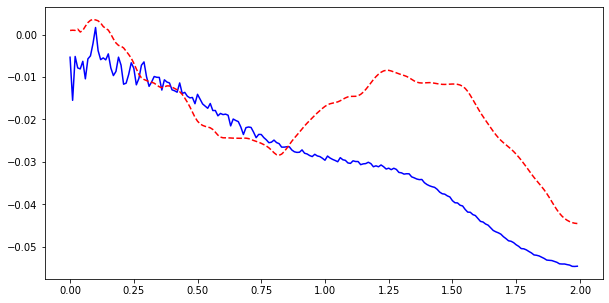

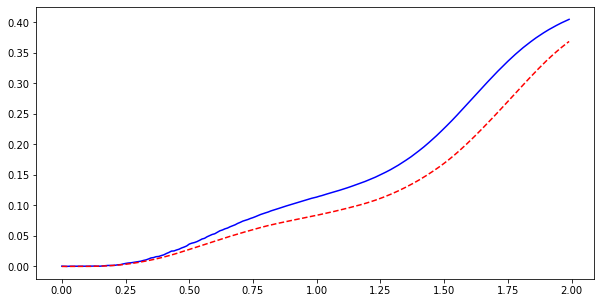

(400, 200) (400, 200, 1)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, None, 50)          2600      
                                                                 
 dense_18 (Dense)            (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
3 0
(10000, 200) (10000, 200)


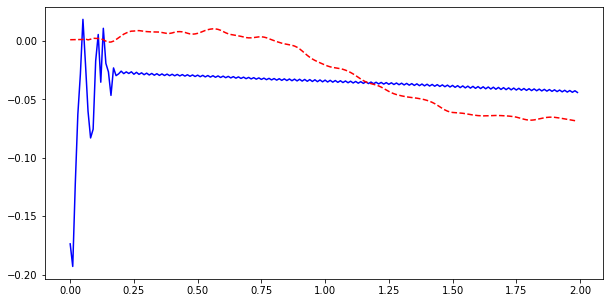

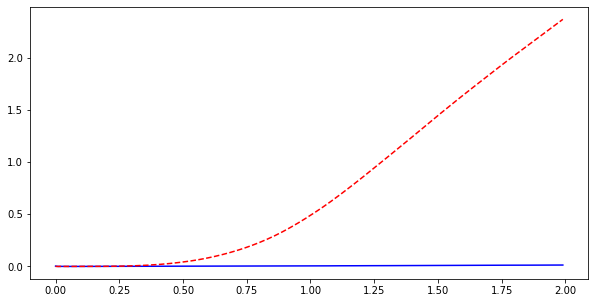

(400, 200) (400, 200, 1)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, None, 50)          2600      
                                                                 
 dense_19 (Dense)            (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
4 0
(10000, 200) (10000, 200)


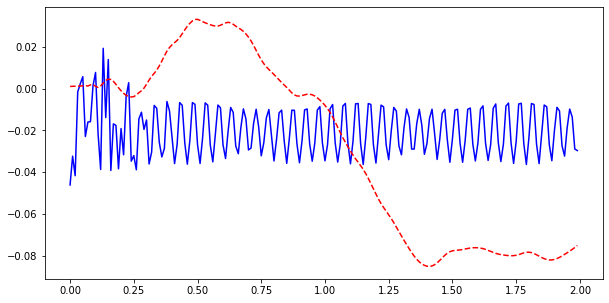

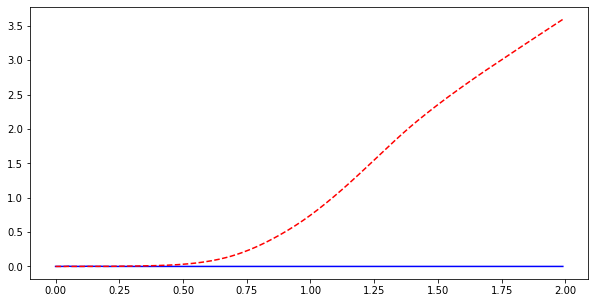

In [4]:
%reset -f

import time
import numpy as np
import scipy.io as spi
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.layers import Dense, Input, Lambda, Dot, LSTM
from tensorflow.keras.layers.experimental import preprocessing

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation, CuDNNLSTM, CuDNNGRU, SimpleRNN

dt = 0.01
min_t = 0
max_t = 2

t = np.arange(min_t, max_t, dt)
lt = t.shape[0]

samples = 10000

data = spi.loadmat('data_400_samples_fs_100Hz_76_storey_NL_20FT.mat')
f_traintoscale = data['f'].T

for disp_num in range(0,5):

    if disp_num == 0:
        y_traintoscale = data['y'][5-1,:,:]
    elif disp_num == 1:
        y_traintoscale = data['y'][15-1,:,:]
    elif disp_num == 2:
        y_traintoscale = data['y'][35-1,:,:]
    elif disp_num == 3:
        y_traintoscale = data['y'][65-1,:,:]
    else:
        y_traintoscale = data['y'][75-1,:,:]

    y_traintoscale = y_traintoscale.T[..., np.newaxis]
    
    print(f_traintoscale.shape, y_traintoscale.shape)

    X_data = f_traintoscale
    y_data = y_traintoscale

    from sklearn.preprocessing import MinMaxScaler

    X_data_flatten = np.reshape(X_data, [X_data.shape[0]*X_data.shape[1], 1])
    scaler_X = MinMaxScaler(feature_range=(-1, 1))
    scaler_X.fit(X_data_flatten)
    
    y_data_flatten = np.reshape(y_data, [y_data.shape[0]*y_data.shape[1], y_data.shape[2]])
    scaler_y = MinMaxScaler(feature_range=(-1, 1))
    scaler_y.fit(y_data_flatten)
    
    adam = Adam(learning_rate=0.001, decay=0.0001)
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, stateful=False, input_shape=(None, 1)))
    model.add(Dense(1))
    model.summary()

    model.compile(loss='mean_squared_error', optimizer=adam)   

    string = './model/RNNS_400S_wts_DO_76DOF_'+str(disp_num+1)
    model.load_weights(string)

    ft = [20, 25, 50, 75, 100]
    for ftnum in range(0,1):
        print(disp_num, ftnum)
        string = 'data_10000_samples_fs_100Hz_76_storey_NL_20FT.mat'
        test_data = spi.loadmat(string)
        f = test_data['f'].T
        
        if disp_num == 0:
            y = test_data['y'][5-1,:,:].T
        elif disp_num == 1:
            y = test_data['y'][15-1,:,:].T
        elif disp_num == 2:
            y = test_data['y'][35-1,:,:].T
        elif disp_num == 3:
            y = test_data['y'][65-1,:,:].T
        else:
            y = test_data['y'][75-1,:,:].T
            
        print(f.shape, y.shape)

        with tf.device('/device:cpu:0'):
            X_data = f
            X_data_flatten = np.reshape(X_data, [X_data.shape[0]*X_data.shape[1], 1])
            X_data_flatten_map = scaler_X.transform(X_data_flatten)
            X_data_map = np.reshape(X_data_flatten_map, [X_data.shape[0], X_data.shape[1], 1])

            X_data_new = X_data_map
            
            test_indices = 10000
            X_test = X_data_new[0:test_indices]
            predictions = model.predict(X_test)
    
            # plt.figure(figsize=[10,5])
            # plt.plot(t,scaler_y.inverse_transform(predictions[599,:,:]), 'b')
            # plt.plot(t,y[599,:], 'r--')
            # plt.show()

            pred_disp = np.zeros([y.shape[0], y.shape[1], 1])
            for i in range(0,10000):
                pred_disp[i,:,:] = scaler_y.inverse_transform(predictions[i,:,:])
            
            plt.figure(figsize=[10,5])
            plt.plot(t,np.mean(pred_disp, axis = 0), 'b')
            plt.plot(t,np.mean(y, axis = 0), 'r--')
            plt.show()

            plt.figure(figsize=[10,5])
            plt.plot(t,np.var(pred_disp, axis = 0), 'b')
            plt.plot(t,np.var(y, axis = 0), 'r--')
            plt.show()
                
            string = 'RNN3L_400S_76DOF_NL_training_samples_'+str(400)+'_plotNo_'+str(disp_num+1)+'_FT_'+str(ft[ftnum])+'.mat' 
            spi.savemat(string,{'actual_y': y, 'predicted_y': np.squeeze(pred_disp), 'model_num': 1500, 'disp_num': disp_num+1, 'fourier_terms': ft[ftnum]})
